In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [10]:
# Import data
basket = pd.read_csv(r"/content/ProductPurchase_01_05_2022[1].csv")

In [16]:
basket['INDEX'] = range(1, len(basket) + 1)
basket.set_index('INDEX', inplace=True)

In [17]:
print(basket.shape)
basket.head(5)

(9687, 10)


,NAME,MOBILE NO,INVOICENO,INVOICEDATE,PRODUCTNAME,SIZE,RATE,UNITNAME,QUANTITY,SALE AMT
INDEX,,,,,,,,,,
1,RAJIV,9.415375e+09,BS/22-23/359,02-05-2022,BRITANIA,NC,45.0,GM,3,135
2,RAJIV,9.415375e+09,BS/22-23/359,02-05-2022,DARK FANTASY CHOCO FILLS,75,35.0,GM,1,35
3,RAJIV,9.415375e+09,BS/22-23/359,02-05-2022,BISK FARM,42GM TIFFUN SLICE,10.0,GM,2,20
4,RAJIV,9.415375e+09,BS/22-23/359,02-05-2022,BRITANIA,115GM,30.0,GM,1,30
5,RAJIV,9.415375e+09,BS/22-23/359,02-05-2022,BRITANIA,115GM CAKE,30.0,GM,1,30


In [18]:
basket.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9687 entries, 1 to 9687
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NAME         9687 non-null   object 
 1   MOBILE NO    9389 non-null   float64
 2   INVOICENO    9687 non-null   object 
 3   INVOICEDATE  9687 non-null   object 
 4   PRODUCTNAME  9687 non-null   object 
 5   SIZE         9687 non-null   object 
 6   RATE         9687 non-null   float64
 7   UNITNAME     9687 non-null   object 
 8   QUANTITY     9687 non-null   int64  
 9   SALE AMT     9687 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 832.5+ KB


# Exploratory Analysis

20 most popular items

In [19]:
len(basket['PRODUCTNAME'].unique())

485

In [27]:
top_20_selling_product = basket['PRODUCTNAME'].value_counts().reset_index(name='Quantity').head(20)

top_20_selling_product

,PRODUCTNAME,Quantity
0,COLD DRINK,355
1,HALDIRAM,214
2,SUGAR,214
3,PARLE G,207
4,GURH,206
5,KWALITY WALLS ICREM,187
6,BRITANIA,176
7,JEERA PREMIUM,165
8,ARHAR DAL,162
9,VIM BAR,139


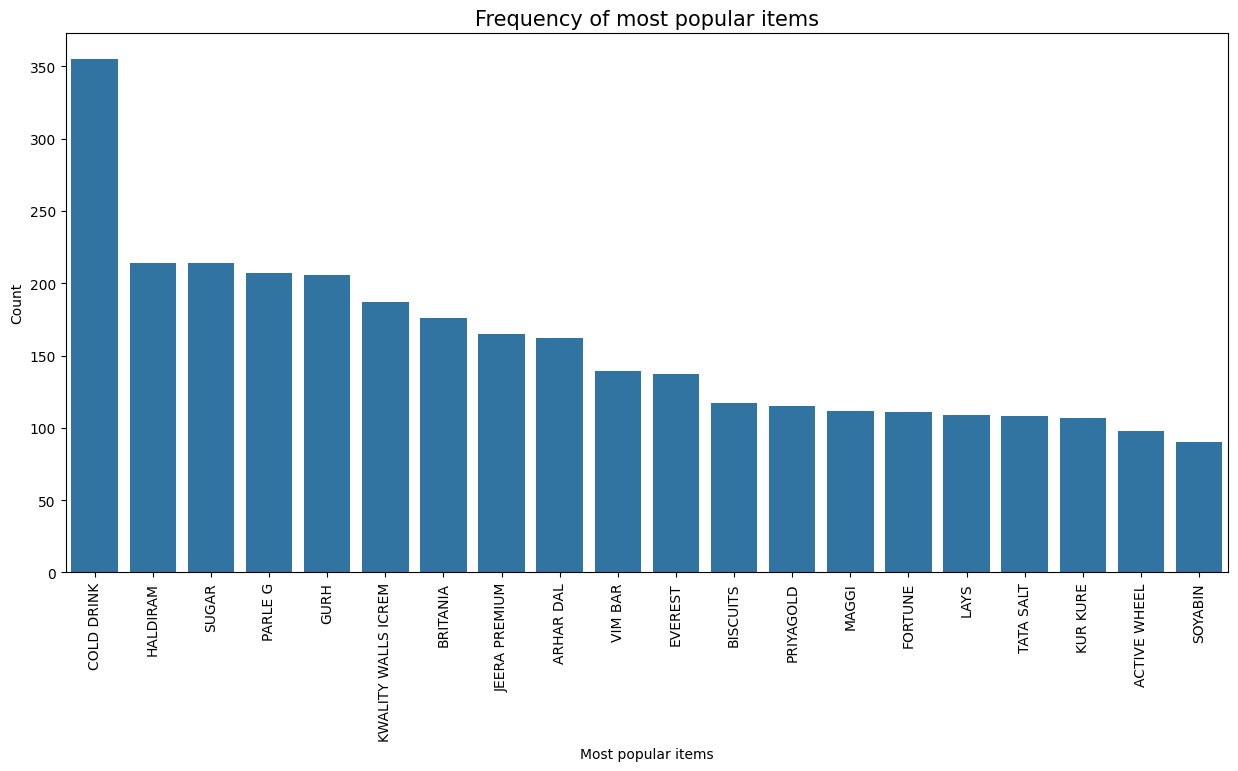

In [26]:
# let's visualize the top 20 selling products
plt.figure(figsize=(15,7))
sns.barplot(x='PRODUCTNAME', y='Quantity', data=top_20_selling_product)
plt.xlabel('Most popular items')
plt.ylabel('Count')
plt.title('Frequency of most popular items', fontsize = 15)
plt.xticks(rotation='vertical')
plt.show()

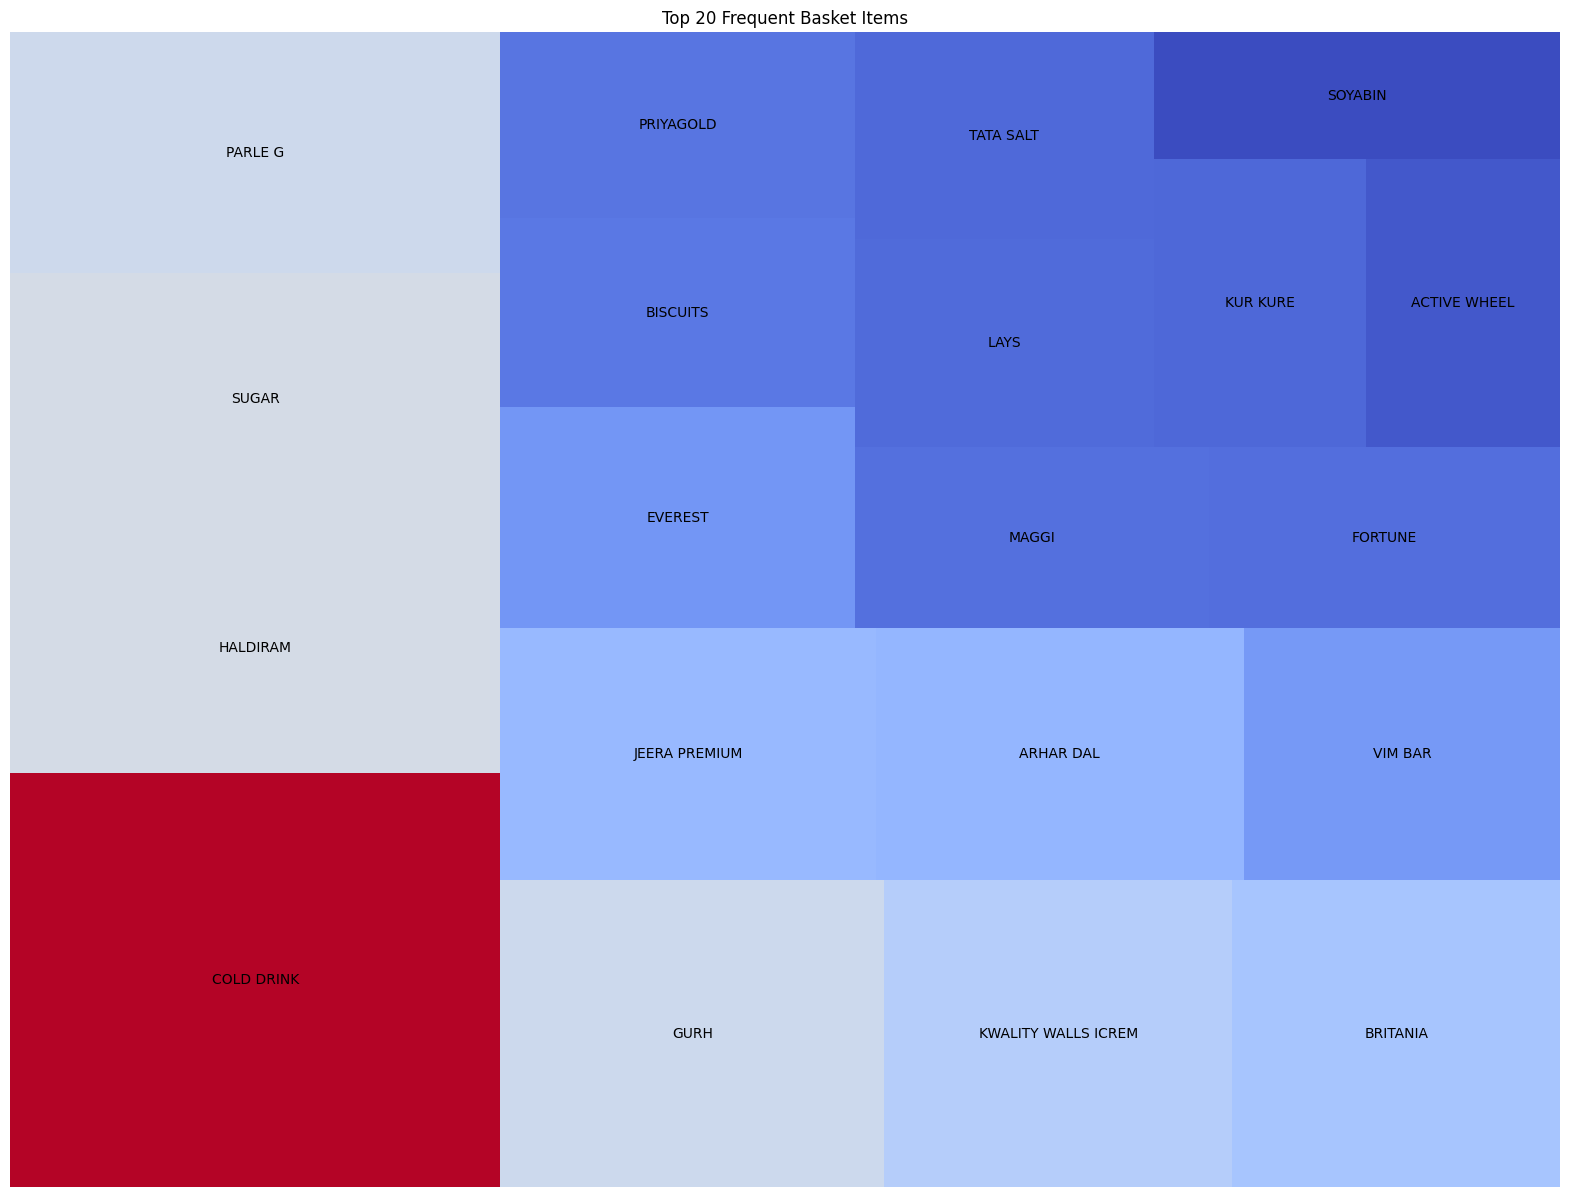

In [34]:
fig, ax = plt.subplots(figsize=(20,15))
cmap = matplotlib.cm.coolwarm

# Get upper and lower boudns for the color mapping
mini = min(top_20_selling_product["Quantity"])
maxi = max(top_20_selling_product["Quantity"])

# Set out color mapping limits
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)

# Obtain our raw colors
colors = [cmap(norm(value)) for value in top_20_selling_product["Quantity"]]

# Create the TreeMap plot with Squarify
!pip install matplotlib pandas squarify
import squarify
squarify.plot(sizes=top_20_selling_product["Quantity"], label=top_20_selling_product["PRODUCTNAME"], color=colors)
plt.axis('off')
plt.title("Top 20 Frequent Basket Items")
ttl = ax.title

Get the 5 most frequent visitors

In [35]:
len(basket['NAME'].unique())

749

In [36]:
basket_agg = basket.groupby(['NAME']).agg({'count'})['INVOICEDATE'].sort_values(['count'], ascending=False)
basket_agg

,count
NAME,
CASH,1447
MOHIT SINGH,98
PANKAJ SINGH,94
AVINAY JI,85
BHAI SAHEB,84
...,...
SHIVA GUPTA,1
AVINASH SINGH,1
PRBHAT JI,1


In [37]:
top_5_visitors = basket['NAME'].value_counts().reset_index(name='Count').head(5)
top_5_visitors

,NAME,Count
0,CASH,1447
1,MOHIT SINGH,98
2,PANKAJ SINGH,94
3,AVINAY JI,85
4,BHAI SAHEB,84


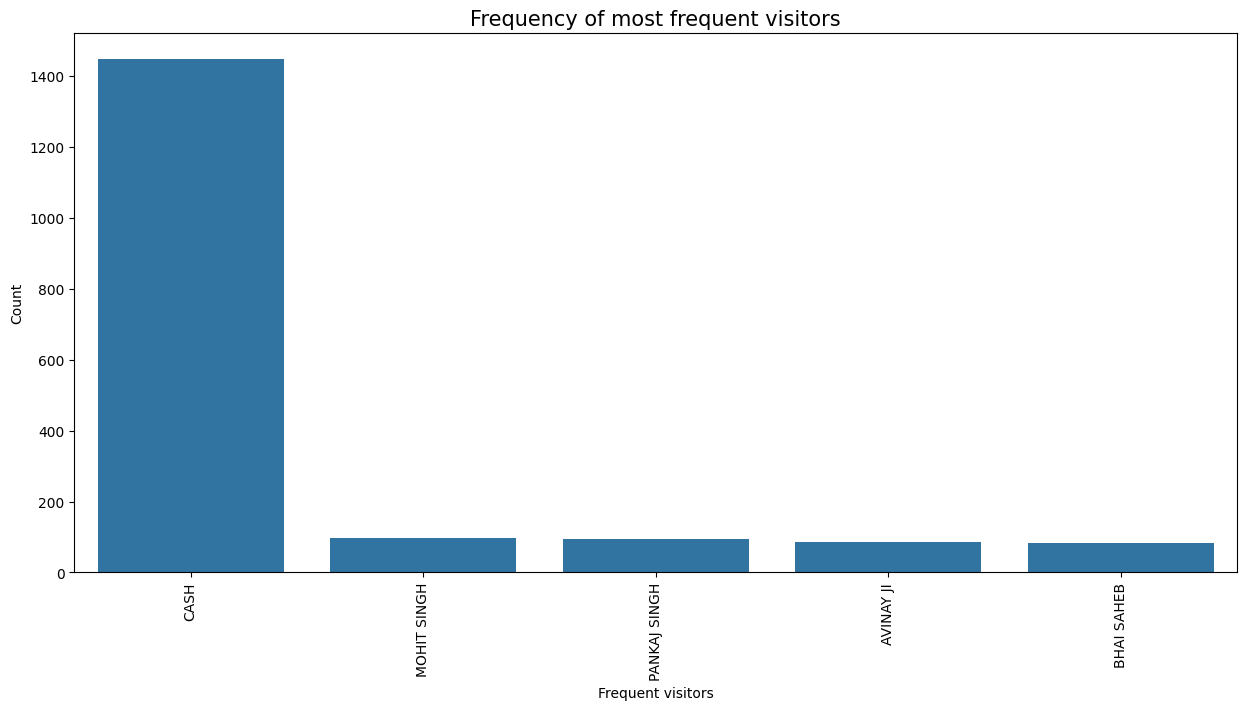

In [38]:
# let's visualize the top 5 most frequent visitors
plt.figure(figsize=(15,7))
sns.barplot(x='NAME', y='Count', data=top_5_visitors)
plt.xlabel('Frequent visitors')
plt.ylabel('Count')
plt.title('Frequency of most frequent visitors', fontsize = 15)
plt.xticks(rotation='vertical')
plt.show()

Get the items purchased for each transaction

In [39]:
# Getting the list of transactions
transactions = []
for i in list(basket.groupby(['NAME','INVOICEDATE'])):
    transactions.append(i[1]['PRODUCTNAME'].tolist())

In [40]:
print(len(transactions))

1310


In [64]:
# There are 1310 unique transactions
transactions.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,5 STAR CHOCLATE,AAJWAIN,ACTIVE WHEEL,ADIDAS SHOWER GEL,AGARBATTI,AJANTA,AJINOMOTO,AKHAROT VINOD,ALASI (TISI),ALIFE LEMON HANDWASH,...,VLCC,WEIKFIELD,WHISPER,WHITE GOL MIRCH,WHITE TONE,WHITE TONE POWDER,WILD STONE,WILD STONE LEGENT,YIPPEE,Z POWDER
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


One-hot encoding transaction data

In [42]:
# We use TransactionEncoder from the mlxtend module to encode the dates
from mlxtend.preprocessing import TransactionEncoder

# One-hot encode transactions
encoder = TransactionEncoder().fit(transactions)
onehot = encoder.transform(transactions)

# Convert to a pandas dataframe
transactions = pd.DataFrame(onehot, columns=encoder.columns_)
transactions

,5 STAR CHOCLATE,AAJWAIN,ACTIVE WHEEL,ADIDAS SHOWER GEL,AGARBATTI,AJANTA,AJINOMOTO,AKHAROT VINOD,ALASI (TISI),ALIFE LEMON HANDWASH,...,VLCC,WEIKFIELD,WHISPER,WHITE GOL MIRCH,WHITE TONE,WHITE TONE POWDER,WILD STONE,WILD STONE LEGENT,YIPPEE,Z POWDER
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1306,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1307,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1308,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [43]:
pf = transactions.describe()
pf

,5 STAR CHOCLATE,AAJWAIN,ACTIVE WHEEL,ADIDAS SHOWER GEL,AGARBATTI,AJANTA,AJINOMOTO,AKHAROT VINOD,ALASI (TISI),ALIFE LEMON HANDWASH,...,VLCC,WEIKFIELD,WHISPER,WHITE GOL MIRCH,WHITE TONE,WHITE TONE POWDER,WILD STONE,WILD STONE LEGENT,YIPPEE,Z POWDER
count,1310,1310,1310,1310,1310,1310,1310,1310,1310,1310,...,1310,1310,1310,1310,1310,1310,1310,1310,1310,1310
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,1281,1291,1218,1309,1258,1309,1305,1303,1307,1306,...,1306,1308,1294,1303,1309,1305,1307,1300,1276,1307


Get the count and frequency of orders

In [44]:
# Get the count
pf.iloc[0]

,count
5 STAR CHOCLATE,1310
AAJWAIN,1310
ACTIVE WHEEL,1310
ADIDAS SHOWER GEL,1310
AGARBATTI,1310
...,...
WHITE TONE POWDER,1310
WILD STONE,1310
WILD STONE LEGENT,1310
YIPPEE,1310


In [45]:
# Get the frequency
pf.iloc[3]

,freq
5 STAR CHOCLATE,1281
AAJWAIN,1291
ACTIVE WHEEL,1218
ADIDAS SHOWER GEL,1309
AGARBATTI,1258
...,...
WHITE TONE POWDER,1305
WILD STONE,1307
WILD STONE LEGENT,1300
YIPPEE,1276


Compute the Support

In [46]:
# The support metric measures the share of transactions that contain an itemset
support = transactions.mean()
support = pd.DataFrame(support, columns=['support']).sort_values('support',ascending=False)
support

,support
COLD DRINK,0.188550
SUGAR,0.154962
GURH,0.139695
HALDIRAM,0.133588
PARLE G,0.130534
...,...
PONDS TRIPLE VITAMIN,0.000763
CHINI CUT,0.000763
CHIKEN MASALA,0.000763
PERFUME,0.000763


In [47]:
support.describe()

,support
count,485.000000
mean,0.013953
std,0.022679
min,0.000763
25%,0.002290
50%,0.006107
75%,0.015267
max,0.188550


Frequent Itemsets

In [48]:
# Finding Frequent Itemsets using our Apriori Module by setting minimum 3% support and maxlen of itemset to be 5
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(transactions, min_support=0.03, use_colnames=True, max_len=5)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets.sort_values(['support'], ascending=False).reset_index(drop=True)

print(len(frequent_itemsets))
frequent_itemsets

96


,support,itemsets,length
0,0.070229,(ACTIVE WHEEL),1
1,0.039695,(AGARBATTI),1
2,0.116794,(ARHAR DAL),1
3,0.038168,(BESAN),1
4,0.080916,(BISCUITS),1
...,...,...,...
91,0.041221,"(TATA SALT, SUGAR)",2
92,0.039695,"(SUGAR, VIM BAR)",2
93,0.033588,"(TATA SALT, VIM BAR)",2
94,0.033588,"(ARHAR DAL, SUGAR, JEERA PREMIUM)",3


Above is the list (in descending order) of the most frequently purchased items (alone or with other products) Item COLD DRINK is present in 18% of baskets

### Computing Support
Support of item x is the ratio of the number of transactions in which item x appears to the total number of transactions.
It gives an idea of how frequent an itemset is in all the transactions.

In [49]:
def support(antecedent, consequent):
    # Compute Support for antecedent and consequent
    supportAB = np.logical_and(transactions[antecedent], transactions[consequent]).mean()

    print("support({0}->{1}) = {2:.3f}".format(antecedent, consequent, supportAB))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
# Compute support for cold-drink and haldiram
support('COLD DRINK', 'HALDIRAM')

support(COLD DRINK->HALDIRAM) = 0.030


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Refining Support with Confidence

- Confidence defines the likelihood of occurence of consequent on the cart given that cart already has antecedent.
- Confidence (x -> y) signifies the likelihood of the item y being purchased when item x is purchased.
- What's the direction of the relationship? Should we use cold-drink to promote haldiram or haldiram to promote cold-drink?
- So, we will now compute the confidence metric for both {Haldiram}->{Cold drink} and {Cold drink}->{Haldiram}

In [51]:
def confidence(antecedent, consequent):
    # Compute Support for antecedent and consequent
    supportAB = np.logical_and(transactions[antecedent], transactions[consequent]).mean()

    # Compute support for antecedent
    supportA = transactions[antecedent].mean()

    # Compute support for consequent
    supportB = transactions[consequent].mean()

    # Compute confidence for both rules
    confidenceAB = supportAB / supportA
    confidenceBA = supportAB / supportB

    print("confidence({0}->{2})={1:.3f}, confidence({2}->{0})={3:.3f}".format(antecedent,confidenceAB,consequent,confidenceBA))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
# Compute confidence for cold-drink and haldiram
confidence('COLD DRINK', 'HALDIRAM')

confidence(COLD DRINK->HALDIRAM)=0.158, confidence(HALDIRAM->COLD DRINK)=0.223


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Clearly, the confidence is much higher for {Haldiram}->{Cold drink} than {Cold drink}->{Haldiram}
So, we should use Haldiram to promote Cold drink, since the rule has a higher confidence metric


Further refinement with Lift

- Lift (x -> y) is the likelihood of the item y being purchased when item x is sold.
- It can simply be considered as correlation between the antecedent and consequent.
- Lift (x -> y) = 1 means that there is no correlation within the itemset
- Lift (x -> y) > 1 means that there is a +ve correlation,i.e., products x and y are more likely to be bought together
- Lift (x -> y) < 1 means that there is a -ve correlation, i.e., products x and y are unlikely to be bought together

In [53]:
def lift(antecedent, consequent):
    # Compute Support for antecedent and consequent
    supportAB = np.logical_and(transactions[antecedent], transactions[consequent]).mean()

    # Compute support for antecedent
    supportA = transactions[antecedent].mean()

    # Compute support for consequent
    supportB = transactions[consequent].mean()

    # Compute Lift
    lift = supportAB / (supportA * supportB)

    print("lift({0}->{1}) = {2:.3f}".format(antecedent,consequent,lift))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [54]:
# Compute lift
lift('HALDIRAM','COLD DRINK')

lift(HALDIRAM->COLD DRINK) = 1.182


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Computing Conviction

- Conviction is the ratio of the expected frequency that x occurs without y if x and y were independent divided by the observed frequency of incorrect predictions.
- A high conviction value means that the consequent is highly depending on the antecedent.
- Conviction (x -> y) = 1 means that x has no relation with y
- Compute conviction for the rule {Haldiram}->{Cold drink} to decide whether to place the items next to each other

In [55]:
def conviction(antecedent, consequent):
    # Compute support for antecedent AND consequent
    supportAB = np.logical_and(transactions[antecedent], transactions[consequent]).mean()

    # Compute support for antecedent
    supportA = transactions[antecedent].mean()

    # Compute support for NOT consequent
    supportnB = 1.0 - transactions[consequent].mean()

    # Compute support for antecedent and NOT consequent
    supportAnB = supportA - supportAB

    # Compute conviction
    conviction = supportA * supportnB / supportAnB

    print("conviction({0}->{1}) = {2:.3f}".format(antecedent,consequent,conviction))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [56]:
# Compute conviction
conviction('HALDIRAM','COLD DRINK')

conviction(HALDIRAM->COLD DRINK) = 1.044


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Computing Leverage
- Leverage computes the difference between the observed frequency of x & y appearing together and the frequency that we would expect if x and y are independent.
- If x,y are +vely correlated then we get (leverage>0), i.e., we need such type of rules
- If x,y are -vely correlated then we get (leverage<0)
- If x,y are independent then we get (leverage=0)

In [57]:
def leverage(antecedent, consequent):
    # Compute support for antecedent AND consequent
    supportAB = np.logical_and(transactions[antecedent], transactions[consequent]).mean()

    # Compute support for antecedent
    supportA = transactions[antecedent].mean()

    # Compute support for consequent
    supportB = transactions[consequent].mean()

    # Compute Leverage
    leverage = supportAB - supportB * supportA

    print("leverage({0}->{1}) = {2:.3f}".format(antecedent,consequent,leverage))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [58]:
# Compute leverage
leverage('HALDIRAM','COLD DRINK')

leverage(HALDIRAM->COLD DRINK) = 0.005


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Association rules

In [59]:
# Now let's generate Association rules
# A rule can be defined as an implication {X->Y}, where X:antecedent and Y:consequent of the rule
from mlxtend.frequent_patterns import association_rules

res = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
res

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(SUGAR),(ACTIVE WHEEL),0.154962,0.070229,0.031298,0.201970,2.875883,0.020415,1.165083,0.771895
1,(ACTIVE WHEEL),(SUGAR),0.070229,0.154962,0.031298,0.445652,2.875883,0.020415,1.524383,0.701550
2,(ACTIVE WHEEL),(VIM BAR),0.070229,0.097710,0.031298,0.445652,4.560971,0.024436,1.627661,0.839721
3,(VIM BAR),(ACTIVE WHEEL),0.097710,0.070229,0.031298,0.320312,4.560971,0.024436,1.367939,0.865297
4,(ARHAR DAL),(EVEREST TURMERIC),0.116794,0.052672,0.030534,0.261438,4.963531,0.024383,1.282666,0.904127
...,...,...,...,...,...,...,...,...,...,...
83,"(ARHAR DAL, VIM BAR)",(SUGAR),0.044275,0.154962,0.030534,0.689655,4.450484,0.023673,2.722901,0.811222
84,"(SUGAR, VIM BAR)",(ARHAR DAL),0.039695,0.116794,0.030534,0.769231,6.586224,0.025898,3.827226,0.883227
85,(ARHAR DAL),"(SUGAR, VIM BAR)",0.116794,0.039695,0.030534,0.261438,6.586224,0.025898,1.300236,0.960328
86,(SUGAR),"(ARHAR DAL, VIM BAR)",0.154962,0.044275,0.030534,0.197044,4.450484,0.023673,1.190259,0.917480


In [60]:
res.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(SUGAR),(ACTIVE WHEEL),0.154962,0.070229,0.031298,0.201970,2.875883,0.020415,1.165083,0.771895
1,(ACTIVE WHEEL),(SUGAR),0.070229,0.154962,0.031298,0.445652,2.875883,0.020415,1.524383,0.701550
2,(ACTIVE WHEEL),(VIM BAR),0.070229,0.097710,0.031298,0.445652,4.560971,0.024436,1.627661,0.839721
3,(VIM BAR),(ACTIVE WHEEL),0.097710,0.070229,0.031298,0.320312,4.560971,0.024436,1.367939,0.865297
4,(ARHAR DAL),(EVEREST TURMERIC),0.116794,0.052672,0.030534,0.261438,4.963531,0.024383,1.282666,0.904127
5,(EVEREST TURMERIC),(ARHAR DAL),0.052672,0.116794,0.030534,0.579710,4.963531,0.024383,2.101421,0.842929
6,(ARHAR DAL),(FORTUNE),0.116794,0.074809,0.034351,0.294118,3.931573,0.025614,1.310687,0.844252
7,(FORTUNE),(ARHAR DAL),0.074809,0.116794,0.034351,0.459184,3.931573,0.025614,1.633098,0.805941
8,(ARHAR DAL),(GURH),0.116794,0.139695,0.031298,0.267974,1.918283,0.014982,1.175239,0.542003
9,(GURH),(ARHAR DAL),0.139695,0.116794,0.031298,0.224044,1.918283,0.014982,1.138216,0.556431


Suggesting a Product to User

In [61]:
def recommend_product(product_name, num_of_products=3):
    recommendation_list = []

    for idx, product in enumerate(res["antecedents"]):
        for j in list(product):
            if j == product_name:
                recommendation_list.append(list(res.iloc[idx]["consequents"])[0])
                recommendation_list = list(dict.fromkeys(recommendation_list))
    if len(recommendation_list) == 0:
        print("There is no product that can be recommended!")
    else:
        print("Related products with",product_name,"can be seen below :")
        for i in range(0, len(recommendation_list[0:num_of_products])):
            print(recommendation_list[i])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [62]:
# Calling function with custom product
recommend_product("COLD DRINK", 3)

Related products with COLD DRINK can be seen below :
GURH
LAYS
PARLE G


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [63]:
recommend_product("SUGAR", 5)

Related products with SUGAR can be seen below :
ACTIVE WHEEL
ARHAR DAL
EVEREST
EVEREST TURMERIC
FORTUNE


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
